In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

In [3]:
# columns
# 1 Dept 1=Biochemistry/Molecular Biology 2=Physiology 3=Genetics 4=Pediatrics 5=Medicine 6=Surgery
# 2 Gender 1=Male, 0=Female
# 3 Clin 1=Primarily clinical emphasis, 0=Primarily research emphasis
# 4 Cert 1=Board certified, 0=not certified
# 5 Prate Publication rate (# publications on cv)/(# years between CV date and MD date)
# 6 Exper # years since obtaining MD
# 7 Rank 1=Assistant, 2=Associate, 3=Full professor (a proxy for productivity)
# 8 Sal94 Salary in academic year 1994
# 9 Sal95 Salary after increment to 1994

In [15]:
gen = pd.read_csv('Lawsuit.csv')

In [12]:
# map department labels
dept_names = ['Biochem/Mol Bio', 'Physiology', 'Genetics', 'Pediatrics', 'Medicine', 'Surgery']
dept_labels = dict(zip(range(1,7), dept_names))
gen['dept_labels'] = gen['Dept'].map(dept_labels)

In [13]:
# create bins for publication rate & years of experience
Prate_bin_map = dict(zip(range(0,9), range(1,10)))
Exper_bin_map = dict(zip(range(0,8), np.arange(5,45,5)))

# convert years of experience into 5-year bins
gen['Exper_bins'] = pd.cut(gen['Exper'], np.arange(0,41,5), labels=False)
gen['Exper_bins'] = gen['Exper_bins'].map(Exper_bin_map)

# convert publication # integer bins
gen['Prate_bins'] = pd.cut(gen['Prate'], np.arange(1,10), labels=False)
gen['Prate_bins'] = gen['Prate_bins'].map(Prate_bin_map)

In [14]:
# save modified dataframe to csv
gen.to_csv('gender.csv')

In [5]:
# set up linear regression
x = gen.drop(columns=['ID','Sal94', 'Sal95', 'dept_labels'], axis=1)
y = gen['Sal94']
lm = LinearRegression().fit(x,y)
rsq = lm.score(x,y)
rsq

In [8]:
d = dict(zip(x.columns, lm.coef_))
d

{'Dept': 28129.701291713394,
 'Gender': 10375.640311595878,
 'Clin': 5186.394339848151,
 'Cert': 15950.15099166876,
 'Prate': -6106.454803021705,
 'Exper': 3743.9402436681867,
 'Rank': 13918.913080522383}

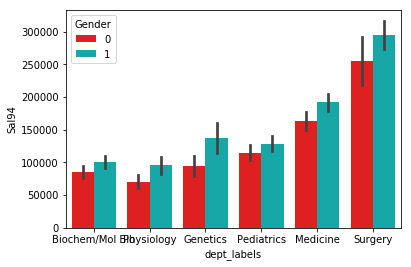

In [9]:
sns.barplot(x='dept_labels', y='Sal94', data=gen, hue='Gender', palette=["r", "c"])

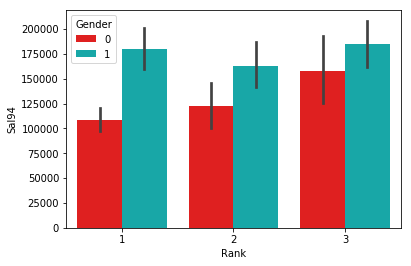

In [10]:
sns.barplot(x='Rank', y='Sal94', data=gen, hue='Gender', palette=["r", "c"])

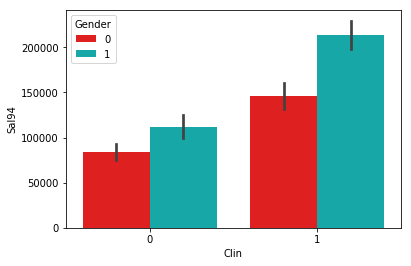

In [11]:
sns.barplot(x='Clin', y='Sal94', data=gen, hue='Gender', palette=["r", "c"])

In [12]:
fem = gen[gen['Gender']==0]
mal = gen[gen['Gender']==1]

xf = fem.drop(columns=['ID','Sal94', 'Sal95', 'Gender', 'dept_labels'], axis=1)
yf = fem['Sal94']

xm = mal.drop(columns=['ID','Sal94', 'Sal95', 'Gender', 'dept_labels'], axis=1)
ym = mal['Sal94']

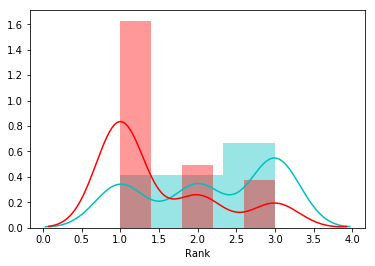

In [13]:
sns.distplot(mal['Rank'], color = 'c')
sns.distplot(fem['Rank'], color = 'r')

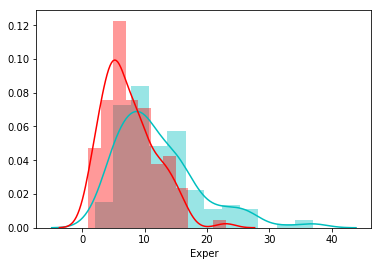

In [14]:
sns.distplot(mal['Exper'], color = 'c')
sns.distplot(fem['Exper'], color = 'r')

In [15]:
lm_f = LinearRegression().fit(xf, yf)
rsq_f = lm_f.score(xf,yf)
rsq_f

0.7668629883627263

In [16]:
df = dict(zip(xf.columns, lm_f.coef_))
df = sorted(df.items(), key = lambda x: np.abs(x[1]), reverse=True)
df

[('Dept', 22092.555462133776),
 ('Cert', 16091.098738572264),
 ('Clin', 15640.351680722444),
 ('Rank', 12381.937544353626),
 ('Exper', 4104.100510236611),
 ('Prate', -1773.2945473298569)]

In [17]:
lm_m = LinearRegression().fit(xm, ym)
rsq_m = lm_m.score(xm,ym)
rsq_m

0.7774750212017606

In [18]:
dm = dict(zip(xm.columns, lm_m.coef_))
dm = sorted(dm.items(), key = lambda x: np.abs(x[1]), reverse=True)

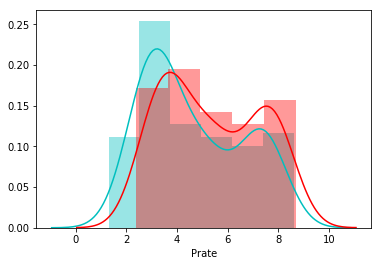

In [19]:
sns.distplot(mal['Prate'], color='c')
sns.distplot(fem['Prate'], color='r')

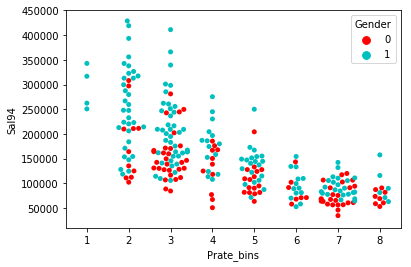

In [22]:
sns.swarmplot(x='Prate_bins', y='Sal94', data=gen, hue='Gender', palette=["r", "c", "y"])

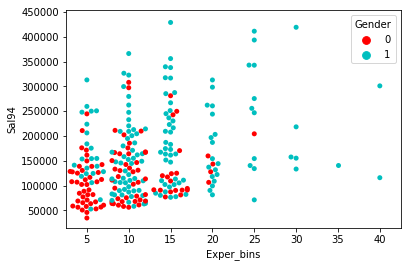

In [23]:
sns.swarmplot(x='Exper_bins', y='Sal94', data=gen, hue='Gender', palette=["r", "c", "y"])

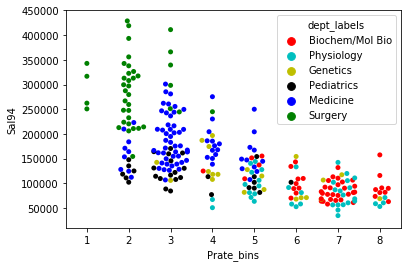

In [24]:
sns.swarmplot(x='Prate_bins', y='Sal94', data=gen, hue='dept_labels', palette=["r", "c", "y", 'k', 'b', 'g'])

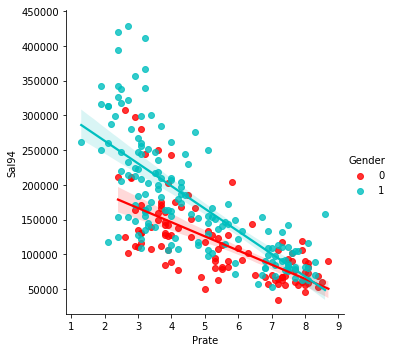

In [25]:
sns.lmplot(x="Prate", y="Sal94", hue="Gender",
               truncate=True, height=5, data=gen, palette=["r", "c"])

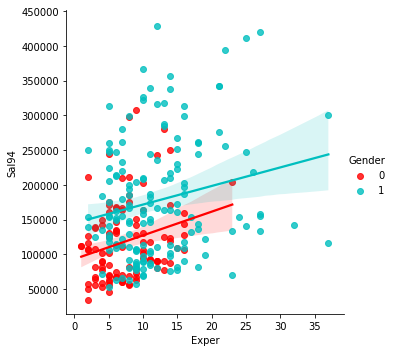

In [26]:
sns.lmplot(x="Exper", y="Sal94", hue="Gender",
               truncate=True, height=5, data=gen, palette=["r", "c"])

In [9]:
gen_short = gen[['Gender', 'Prate', 'Exper', 'Sal94']]

/Users/djb326/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/djb326/.pyenv/versions/3.6.7/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


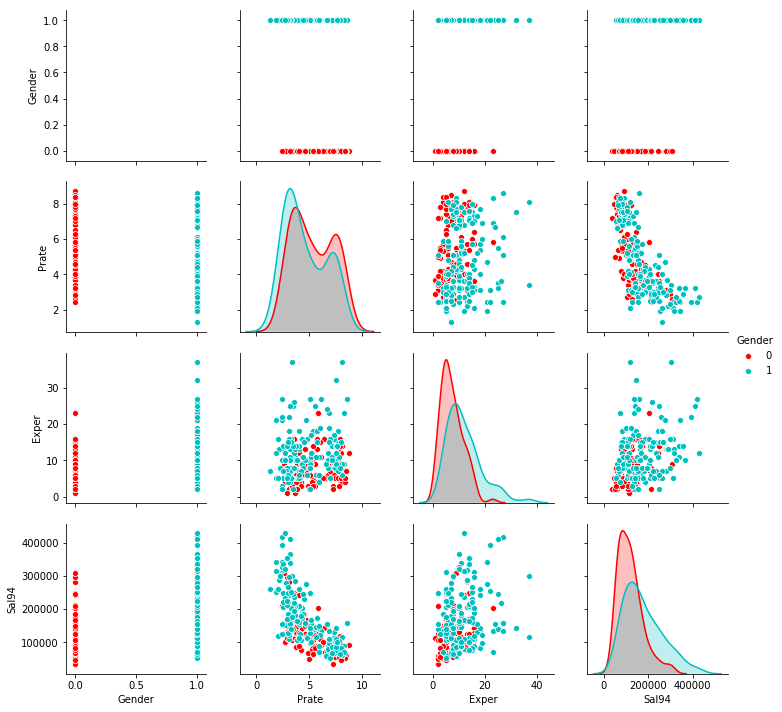

In [10]:
sns.pairplot(gen_short, hue="Gender", palette=["r", "c", "y"])

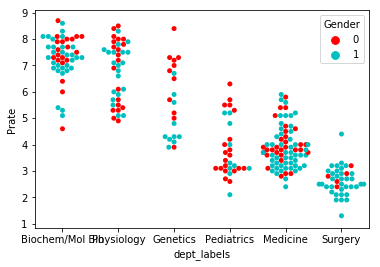

In [7]:
sns.swarmplot(x='dept_labels', y='Prate', hue='Gender', data=gen, palette = ["r", "c", "y"])

In [ ]:
rp.summary_cont(gen['Sal94'])

In [ ]:
rp.summary_cont(gen.groupby(['Gender', 'Exper_bins']))['Sal94']